In [2]:
import numpy as np
import tensorflow.keras as tk
from matplotlib import pyplot
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
import os
import keras

In [3]:
#loading data

mnist=tk.datasets.mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()



train_X = np.expand_dims(train_X,-1)
test_X = np.expand_dims(test_X,-1)



train_y= tk.utils.to_categorical(train_y,num_classes=None)
test_y= tk.utils.to_categorical(test_y,num_classes=None)


#creating layers

vcm = tk.Sequential()
vcm.add(Conv2D(32,(3,3),input_shape = (28,28,1), activation= 'relu'))

vcm.add(MaxPooling2D(pool_size = (2,2)))

vcm.add(Conv2D(64,(3,3),activation='relu' ))
vcm.add(MaxPooling2D(pool_size = (2,2)))

vcm.add(Conv2D(128,(3,3),activation='relu' ))
vcm.add(MaxPooling2D(pool_size = (2,2)))

#vcm.add(Conv2D(256,(3,3),activation='relu' ))
#vcm.add(MaxPooling2D(pool_size = (2,2)))

vcm.add(Flatten())
vcm.add(Dense(units=1024,activation = 'relu'))
vcm.add(Dense(units=10,activation = 'softmax'))

#compile
vcm.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])
vcm.summary()

11501568/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                         

In [4]:
#train model

history = vcm.fit(train_X,train_y,epochs=15,validation_data=(test_X,test_y))

Epoch 12/15
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0348 - accuracy: 0.9906 - val_loss: 0.0719 - val_accuracy: 0.9847
Epoch 13/15
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0290 - accuracy: 0.9921 - val_loss: 0.1211 - val_accuracy: 0.9809
Epoch 14/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0325 - accuracy: 0.9914 - val_loss: 0.0879 - val_accuracy: 0.9848
Epoch 15/15
1875/1875 [==============================] - 201s 108ms/step - loss: 0.0295 - accuracy: 0.9926 - val_loss: 0.1341 - val_accuracy: 0.9818


In [5]:
vcm.save("lior_modelnew211.h5")
vcm.save_weights("lior_weightsnew211.hdf5")




In [6]:
#load model
loaded_mod=keras.models.load_model('lior_modelnew211.h5')

vcm_pre = vcm.predict(test_X)
print(vcm_pre)






[[0.00000000e+00 7.50926200e-28 1.71733257e-21 ... 1.00000000e+00
  0.00000000e+00 1.24395177e-28]
 [4.02735327e-13 9.02484383e-16 1.00000000e+00 ... 2.32894995e-14
  6.50690022e-16 1.48562437e-24]
 [5.37663809e-24 1.00000000e+00 2.64177913e-19 ... 1.83601810e-19
  8.76661564e-17 4.41793962e-27]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.58216347e-37
  0.00000000e+00 0.00000000e+00]
 [5.59032867e-24 5.00381155e-28 1.15679944e-29 ... 2.82774568e-27
  3.88726550e-19 2.42554750e-18]
 [1.94017165e-31 2.47585538e-37 3.82676331e-35 ... 0.00000000e+00
  1.38255523e-36 0.00000000e+00]]


(1, 28, 28, 1)
pre_result:  [5.5401218e-31 2.4396097e-30 9.4884737e-27 1.0000000e+00 3.8971222e-35
 1.0535128e-18 5.1887402e-32 6.4631437e-22 4.6263009e-22 1.4459547e-24]
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


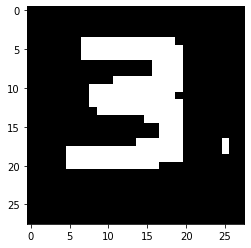

In [7]:
#classify nexample
testimg = image.load_img("three.png")
testimg= image.img_to_array(testimg)
pyplot.imshow(testimg)

testimg=np.expand_dims(testimg,0)

testimg=np.expand_dims(testimg,-1)

print(testimg[:,:,:,0,:].shape)

pre_result = vcm.predict(testimg[:,:,:,0,:])
print("pre_result: "  , pre_result[0])
print(pre_result[0].argmax())

In [8]:
#converting to Tensorflow Lite

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_mod)
tflite1_model22 = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmprvz1c5gy/assets


In [9]:
open('lior_modelnew211lite.h5','wb').write(tflite1_model22)

943672

In [10]:
print("main model size : " , os.path.getsize("lior_modelnew211.h5")/(1024*1024))
print("Lite model size : " , os.path.getsize("lior_weightsnew211.hdf5")/(1024*1024))

main model size :  2.7415008544921875
Lite model size :  0.9212265014648438


In [11]:
interpreter = tf.lite.Interpreter('lior_modelnew211lite.h5')

input_details = interpreter.get_input_details()
out_details = interpreter.get_output_details()


print(input_details)
print("-"*10)
print(input_details)




[{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([-1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
[{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([-1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [12]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], testimg[:,:,:,0,:])
interpreter.invoke()

tflite_pred_res= interpreter.get_tensor(out_details[0]['index'])
print(tflite_pred_res.argmax())



3
